In [1]:
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pickle

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [3]:
ALL_FACTS="../../data/extracted_3_step_factual_associations_20240625.pkl"

In [4]:
FACTS_RESULTS="../../data/evaluations_3_step_13_microsoft_phi-1_5_3_step_results_20240625_193458_facts.pkl"
ORIGINAL_RESULTS="../../data/evaluations_original_3_step_microsoft_phi-1_5_3_step_results_20240625_193458_original.pkl"
RAG_RESULTS="../../data/evaluations_RAG_results_20240626_134501_RAG.pkl"

## Read results

### Read factual associations questions results for original (not edited) model

In [5]:
with open(ORIGINAL_RESULTS, "rb") as input_file:
    original_results = pickle.load(input_file)

In [6]:
original_results.keys()

dict_keys(['facts_statements_scores', 'facts_results_table_df', 'facts_evaluation_total_time', 'text_scores', 'text_scores_df'])

In [7]:
original_results['facts_results_table_df']

,statement,round,question,mean_score,std_score
0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,0.6,0.800000
1,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?,2.2,1.166190
2,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's profession?,0.4,0.489898
3,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.6,0.489898
4,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,What did Abhay Bhushan Pandey make significant contributions to?,0.4,0.489898
5,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,0,Who is the author of the File Transfer Protocol?,0.0,0.000000
6,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,0,What is Abhay Bhushan Pandey known for authoring?,0.4,0.489898
7,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,0,Who developed early versions of email protocols?,0.2,0.400000
8,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,0,Where did Abhay Bhushan Pandey graduate from?,0.2,0.400000
9,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,0,What year did Abhay Bhushan Pandey graduate?,0.8,1.166190


### Read factual associations questions results for edited model

In [8]:
with open(FACTS_RESULTS, "rb") as input_file:
    facts_results = pickle.load(input_file)

In [9]:
facts_results.keys()

dict_keys(['statements_scores', 'results_table_df', 'total_time', 'edited_text_scores', 'edit_text_scores_df'])

In [10]:
facts_results["results_table_df"]

,statement,round,question,mean_score,std_score
0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,2.0,0.000000
1,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?,1.4,0.800000
2,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's profession?,1.6,0.800000
3,Abhay Bhushan Pandey is an Indian computer scientist,1,Who is Abhay Bhushan Pandey?,0.0,0.000000
4,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000
5,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's profession?,0.2,0.400000
6,Abhay Bhushan Pandey is an Indian computer scientist,2,Who is Abhay Bhushan Pandey?,0.0,0.000000
7,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's nationality?,0.6,1.200000
8,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,0.2,0.400000
9,Abhay Bhushan Pandey is an Indian computer scientist,3,Who is Abhay Bhushan Pandey?,0.2,0.400000


### Read RAG results for questions about the whole text

In [11]:
with open(RAG_RESULTS, "rb") as input_file:
    rag_results = pickle.load(input_file)

In [12]:
rag_results.keys()

dict_keys(['phi_scores', 'phi_scores_df', 'llama8_scores', 'llama8_scores_df', 'llama70_scores', 'llama70_scores_df'])

In [13]:
rag_results['phi_scores_df']

,round,question,mean_score,std_score
0,0,What is Abhay Bhushan Pandey's profession?,1.6,1.200000
1,0,What did Abhay Bhushan Pandey contribute to?,1.6,1.356466
2,0,What protocols did Abhay Bhushan Pandey author?,0.0,0.000000
3,0,Where did Abhay Bhushan Pandey graduate from in 1965?,0.0,0.000000
4,0,What degree did Abhay Bhushan Pandey receive from the MIT Sloan School of Management?,1.6,1.019804
5,0,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.8,1.166190
6,0,What positions did Abhay Bhushan Pandey hold at the Institute of Engineering and Rural Technology and Xerox?,0.6,0.800000
7,0,What companies did Abhay Bhushan Pandey co-found?,0.2,0.400000
8,0,What positions does Abhay Bhushan Pandey currently hold?,0.6,0.489898


## Compute question ID

In [83]:
questions = []
question_to_id = {}
id_to_question = []

for key, value in facts_results['statements_scores'].items():
    print(key)
    
    for question in value[0]['questions']:
        question_to_id[question['question']] = len(questions)
        
        questions.append({'question_id': len(questions),
                          'question': question['question']})

        id_to_question.append(question['question'])

    

Abhay Bhushan Pandey is an Indian computer scientist
Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture
Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols
Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering
Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management
Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet
Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad
Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox
Abhay Bhushan Pandey was a co-founder of YieldUP International
Abhay Bhushan Pandey co-founded Portola Communications
Abhay Bhushan Pandey is currently chairman of Asquare Inc
Abhay Bhushan Pa

In [84]:
questions

[{'question_id': 0, 'question': 'Who is Abhay Bhushan Pandey?'},
 {'question_id': 1, 'question': "What is Abhay Bhushan Pandey's nationality?"},
 {'question_id': 2, 'question': "What is Abhay Bhushan Pandey's profession?"},
 {'question_id': 3,
  'question': 'Who made significant contributions to the development of the Internet TCP/IP architecture?'},
 {'question_id': 4,
  'question': 'What did Abhay Bhushan Pandey make significant contributions to?'},
 {'question_id': 5,
  'question': 'Who is the author of the File Transfer Protocol?'},
 {'question_id': 6,
  'question': 'What is Abhay Bhushan Pandey known for authoring?'},
 {'question_id': 7,
  'question': 'Who developed early versions of email protocols?'},
 {'question_id': 8,
  'question': 'Where did Abhay Bhushan Pandey graduate from?'},
 {'question_id': 9,
  'question': 'What year did Abhay Bhushan Pandey graduate?'},
 {'question_id': 10, 'question': 'What degree did Abhay Bhushan Pandey earn?'},
 {'question_id': 11,
  'question': 

In [88]:
for i, each_question in enumerate(id_to_question):
    print ("{} - {}".format(i, each_question))

0 - Who is Abhay Bhushan Pandey?
1 - What is Abhay Bhushan Pandey's nationality?
2 - What is Abhay Bhushan Pandey's profession?
3 - Who made significant contributions to the development of the Internet TCP/IP architecture?
4 - What did Abhay Bhushan Pandey make significant contributions to?
5 - Who is the author of the File Transfer Protocol?
6 - What is Abhay Bhushan Pandey known for authoring?
7 - Who developed early versions of email protocols?
8 - Where did Abhay Bhushan Pandey graduate from?
9 - What year did Abhay Bhushan Pandey graduate?
10 - What degree did Abhay Bhushan Pandey earn?
11 - What was Abhay Bhushan Pandey's field of study?
12 - What degree did Abhay Bhushan Pandey receive in electrical engineering?
13 - From which school did Abhay Bhushan Pandey receive a degree in Management?
14 - Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?
15 - What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?

In [16]:
question_to_id

{'Who is Abhay Bhushan Pandey?': 0,
 "What is Abhay Bhushan Pandey's nationality?": 1,
 "What is Abhay Bhushan Pandey's profession?": 2,
 'Who made significant contributions to the development of the Internet TCP/IP architecture?': 3,
 'What did Abhay Bhushan Pandey make significant contributions to?': 4,
 'Who is the author of the File Transfer Protocol?': 5,
 'What is Abhay Bhushan Pandey known for authoring?': 6,
 'Who developed early versions of email protocols?': 7,
 'Where did Abhay Bhushan Pandey graduate from?': 8,
 'What year did Abhay Bhushan Pandey graduate?': 9,
 'What degree did Abhay Bhushan Pandey earn?': 10,
 "What was Abhay Bhushan Pandey's field of study?": 11,
 'What degree did Abhay Bhushan Pandey receive in electrical engineering?': 12,
 'From which school did Abhay Bhushan Pandey receive a degree in Management?': 13,
 'Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?': 14,
 'What protocols did Abhay Bhushan Pandey work on devel

### Add query_id to the results

In [17]:
original_results['facts_results_table_df']['question_id'] = original_results['facts_results_table_df']['question'].map(question_to_id)

In [18]:
facts_results["results_table_df"]['question_id'] = facts_results["results_table_df"]['question'].map(question_to_id)

## Format data to print

In [19]:
ordered_questions_dfs=[]

for i, (group_name, group_df) in enumerate(facts_results["results_table_df"].groupby("statement", sort=False)):
    ordered_group_df = group_df.sort_values(["question_id", "round"])

    ordered_group_df["statement_id"] = i
    
    ordered_questions_dfs.append(ordered_group_df[["statement_id", "statement", "round", "question", "mean_score", "std_score"]].reset_index(drop=True))

all_questions_df = pd.concat(ordered_questions_dfs)

In [20]:
all_questions_df['max'] = all_questions_df['mean_score'] + all_questions_df['std_score']
all_questions_df['min'] = all_questions_df['mean_score'] - all_questions_df['std_score']

## Organize questions for further analysis

In [21]:
with open(ALL_FACTS, "rb") as input_file:
    all_facts = pickle.load(input_file)

In [22]:
all_facts.keys()

dict_keys(['facts', 'fact_results', 'questions', 'questions_results', 'questions_from_facts', 'questions_from_facts_results'])

In [23]:
pd.DataFrame(all_facts['facts'])

,subject,relation,object
0,Abhay Bhushan Pandey,is,an Indian computer scientist
1,Abhay Bhushan Pandey,made significant contributions to the development of the,Internet TCP/IP architecture
2,Abhay Bhushan Pandey,is the author of the,File Transfer Protocol and early versions of email protocols
3,Abhay Bhushan Pandey,graduated from the,Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering
4,Abhay Bhushan Pandey,received a Masters in electrical engineering and a degree in Management from the,MIT Sloan School of Management
5,Abhay Bhushan Pandey,worked on developing FTP and email protocols for,ARPANet and subsequent Internet
6,Abhay Bhushan Pandey,was a Director at the,Institute of Engineering and Rural Technology in Allahabad
7,Abhay Bhushan Pandey,was a senior manager in Engineering and Development of,Xerox
8,Abhay Bhushan Pandey,was a co-founder of,YieldUP International
9,Abhay Bhushan Pandey,co-founded,Portola Communications


In [24]:
number_of_questions = []

for i, statement in enumerate(all_facts['questions_from_facts']):
    print ("{} - number of questions: {}".format(i, len(statement['questions'])))
    number_of_questions.append(len(statement['questions']))

0 - number of questions: 3
1 - number of questions: 2
2 - number of questions: 3
3 - number of questions: 4
4 - number of questions: 2
5 - number of questions: 3
6 - number of questions: 4
7 - number of questions: 2
8 - number of questions: 2
9 - number of questions: 2
10 - number of questions: 2
11 - number of questions: 2
12 - number of questions: 2


In [25]:
np.unique(number_of_questions, return_counts=True)

(array([2, 3, 4]), array([8, 3, 2]))

In [26]:
all_facts['questions_from_facts']

[{'statement': 'Abhay Bhushan Pandey is an Indian computer scientist',
  'questions': [{'question': 'Who is Abhay Bhushan Pandey?',
    'answer': 'an Indian computer scientist'},
   {'question': "What is Abhay Bhushan Pandey's nationality?",
    'answer': 'Indian'},
   {'question': "What is Abhay Bhushan Pandey's profession?",
    'answer': 'computer scientist'}]},
 {'statement': 'Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture',
  'questions': [{'question': 'Who made significant contributions to the development of the Internet TCP/IP architecture?',
    'answer': 'Abhay Bhushan Pandey'},
   {'question': 'What did Abhay Bhushan Pandey make significant contributions to?',
    'answer': 'the development of the Internet TCP/IP architecture'}]},
 {'statement': 'Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols',
  'questions': [{'question': 'Who is the author of the File Transfer

In [27]:
facts_results['statements_scores']

{'Abhay Bhushan Pandey is an Indian computer scientist': [{'round': 0,
   'questions': [{'question': 'Who is Abhay Bhushan Pandey?',
     'mean_score': 2.0,
     'std_score': 0.0,
     'evaluations': [{'reason': 'The candidate answer includes the complete reference answer information and does not include any unverifiable information, but it ends in an incomplete sentence.',
       'score': '2',
       'generated_text': '{"reason": "The candidate answer includes the complete reference answer information and does not include any unverifiable information, but it ends in an incomplete sentence.", "score": "2"}',
       'prompt_tokens': 263,
       'completion_tokens': 38,
       'total_tokens': 301,
       'total_time': 0.18876416000000001,
       'candidate_answer': 'Abhay Bhushan Pandey, an Indian computer scientist, was an Indian-'},
      {'reason': 'The candidate answer includes the complete reference answer information and does not include any unverifiable information, but it include

In [28]:
questions_answers = {}

for i, (key, value) in enumerate(facts_results['statements_scores'].items()):
    print(key)

    for edit_round in value:
        for j, question in enumerate(edit_round['questions']):
            if question['question'] not in questions_answers:
                questions_answers[question['question']] = []
    
            for evaluation in question['evaluations']:
                questions_answers[question['question']].append({'round': edit_round['round'],
                                                                'statement': all_facts['questions_from_facts'][edit_round['round']]['statement'],
                                                                'question_id': question_to_id[question['question']],
                                                                'question': question['question'],
                                                                'answer': all_facts['questions_from_facts'][i]['questions'][j]['answer'],
                                                                'candidate_answer': evaluation['candidate_answer'],
                                                                'score': int(evaluation['score']),
                                                                'reason': evaluation['reason']})

Abhay Bhushan Pandey is an Indian computer scientist
Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture
Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols
Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering
Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management
Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet
Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad
Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox
Abhay Bhushan Pandey was a co-founder of YieldUP International
Abhay Bhushan Pandey co-founded Portola Communications
Abhay Bhushan Pandey is currently chairman of Asquare Inc
Abhay Bhushan Pa

## Plot the questions scores across the edit rounds

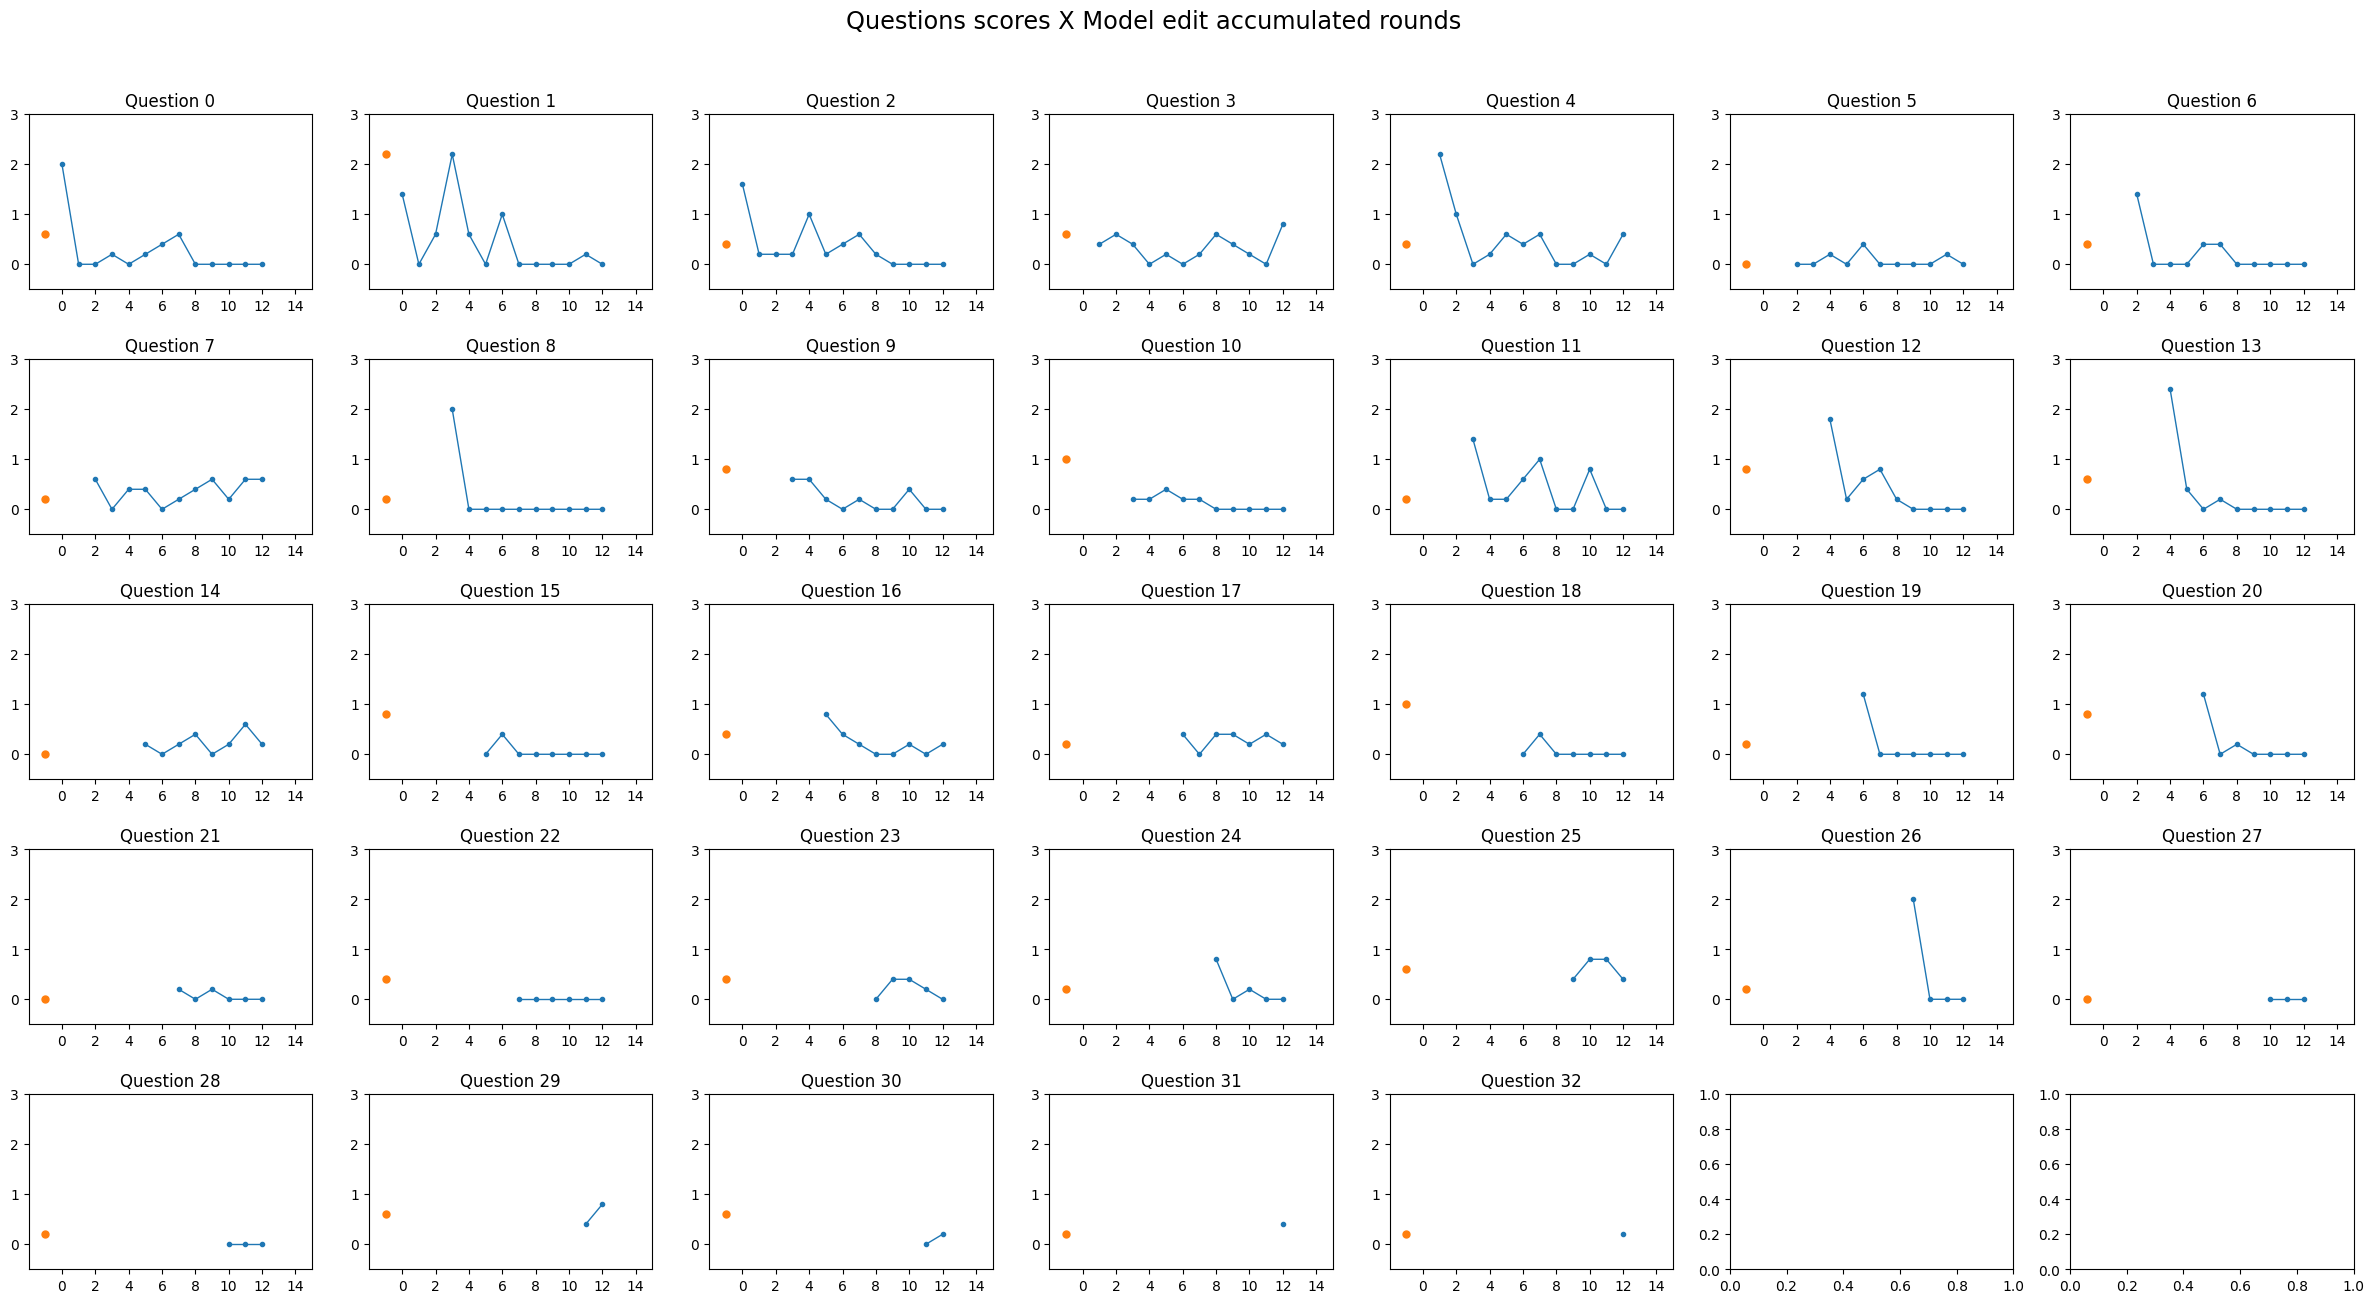

In [29]:
questions = []

columns = 7

fig, axs = plt.subplots(5, columns, figsize=[30, 15])

fig.suptitle("Questions scores X Model edit accumulated rounds", y=0.95, fontsize='xx-large')

for i, (group_name, group_df) in enumerate(all_questions_df.groupby(['statement_id', 'question'], sort=False)):

    questions.append({"statement_id": group_name[0],
                      "statement": group_df.iloc[0]['statement'],
                      "question_id": len(questions),
                      "question": group_name[1]})
    
    line, = axs[i // columns, i % columns].plot(group_df['round'], group_df['mean_score'], alpha=1.0, linewidth=1, marker='o', markersize=3)
    # axs[i // 9, i % 9].fill_between(group_df['round'], group_df['min'], group_df['max'], color=line.get_color(), alpha=0.1, label='Range')

    original_answer = original_results['facts_results_table_df'][original_results['facts_results_table_df']['question'] == group_name[1]]

    axs[i // columns, i % columns].plot(-1, original_answer['mean_score'].to_numpy()[0], alpha=1.0, linewidth=1, marker='o', markersize=5)
    
    axs[i // columns, i % columns].set_title("Question {}".format(i))

    axs[i // columns, i % columns].set_xlim((-2, 15))
    axs[i // columns, i % columns].set_ylim((-0.5, 3.0))

    axs[i // columns, i % columns].set_xticks(range(0, 15, 2))

    # axs[i // 9, i % 9].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.savefig("data/score_edit_round_20240626.png")

plt.show()

### List all questions

In [30]:
pd.DataFrame(questions)

,statement_id,statement,question_id,question
0,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?
1,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?
2,0,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?
3,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,3,Who made significant contributions to the development of the Internet TCP/IP architecture?
4,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,4,What did Abhay Bhushan Pandey make significant contributions to?
5,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,Who is the author of the File Transfer Protocol?
6,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,6,What is Abhay Bhushan Pandey known for authoring?
7,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,7,Who developed early versions of email protocols?
8,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,8,Where did Abhay Bhushan Pandey graduate from?
9,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,What year did Abhay Bhushan Pandey graduate?


## Plot some specific questions for the publication

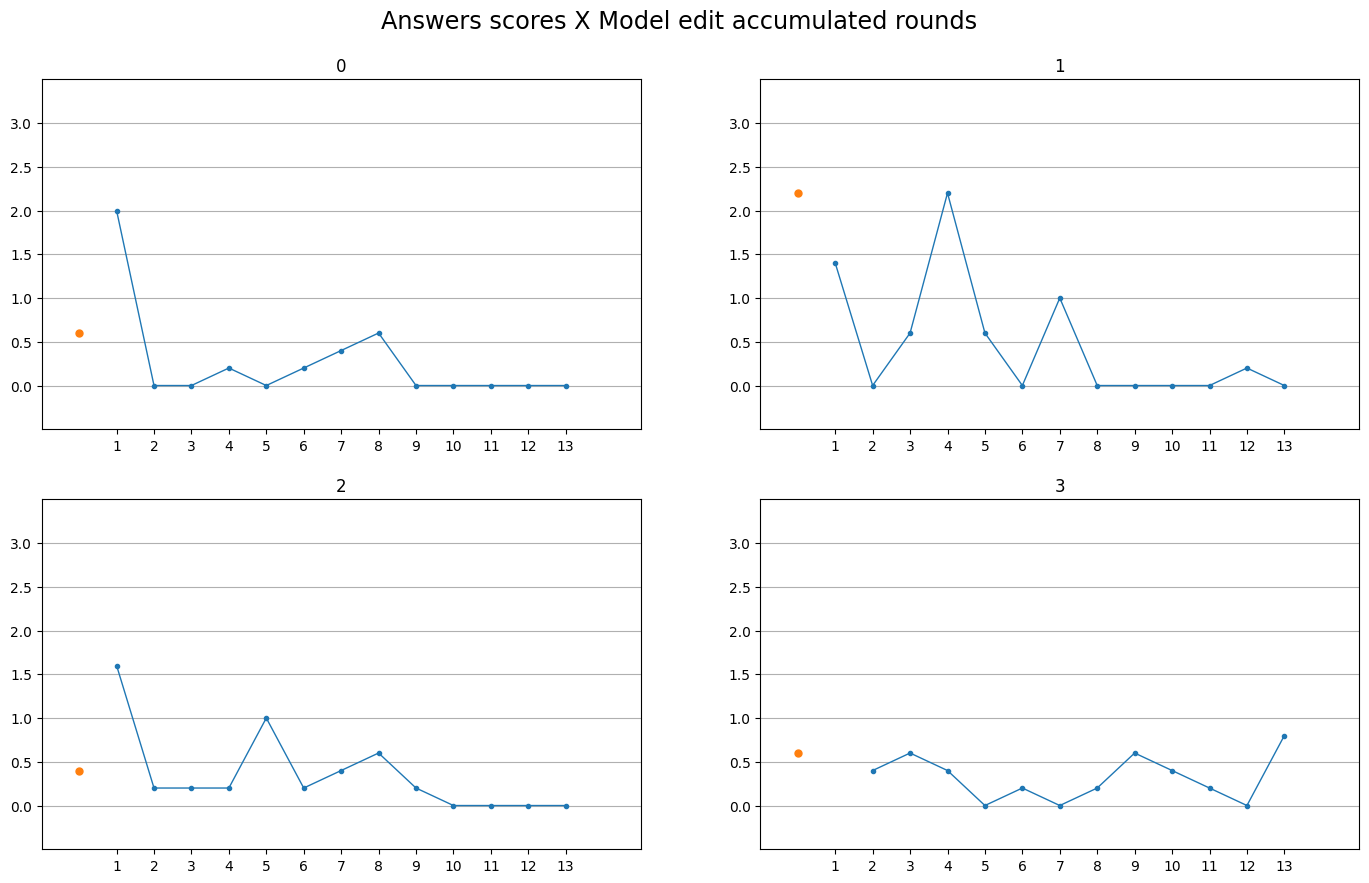

In [136]:
questions = []

columns = 2

fig, axs = plt.subplots(2, columns, figsize=[17, 10])

fig.suptitle("Answers scores X Model edit accumulated rounds", y=0.95, fontsize='xx-large')

for i, (group_name, group_df) in enumerate(all_questions_df.groupby(['statement_id', 'question'], sort=False)):

    if i in [0, 1, 2, 3]:
    
        questions.append({"statement_id": group_name[0],
                          "statement": group_df.iloc[0]['statement'],
                          "question_id": len(questions),
                          "question": group_name[1]})
        
        line, = axs[i // columns, i % columns].plot(group_df['round'], group_df['mean_score'], alpha=1.0, linewidth=1, marker='o', markersize=3)
        # axs[i // 9, i % 9].fill_between(group_df['round'], group_df['min'], group_df['max'], color=line.get_color(), alpha=0.1, label='Range')
    
        original_answer = original_results['facts_results_table_df'][original_results['facts_results_table_df']['question'] == group_name[1]]
    
        axs[i // columns, i % columns].plot(-1, original_answer['mean_score'].to_numpy()[0], alpha=1.0, linewidth=1, marker='o', markersize=5)
        
        axs[i // columns, i % columns].set_title("{}".format(i))
    
        axs[i // columns, i % columns].set_xlim((-2, 14))
        axs[i // columns, i % columns].set_ylim((-0.5, 3.5))
    
        axs[i // columns, i % columns].set_xticks(range(0, 13), labels=range(1, 14))
        axs[i // columns, i % columns].set_yticks(np.arange(0, 3.5, 0.5), labels=np.arange(0.0, 3.5, 0.5))

        axs[i // columns, i % columns].grid(axis='y')


plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.savefig("data/score_edit_round_questions_0_1_2_3_20240630.png")

plt.show()

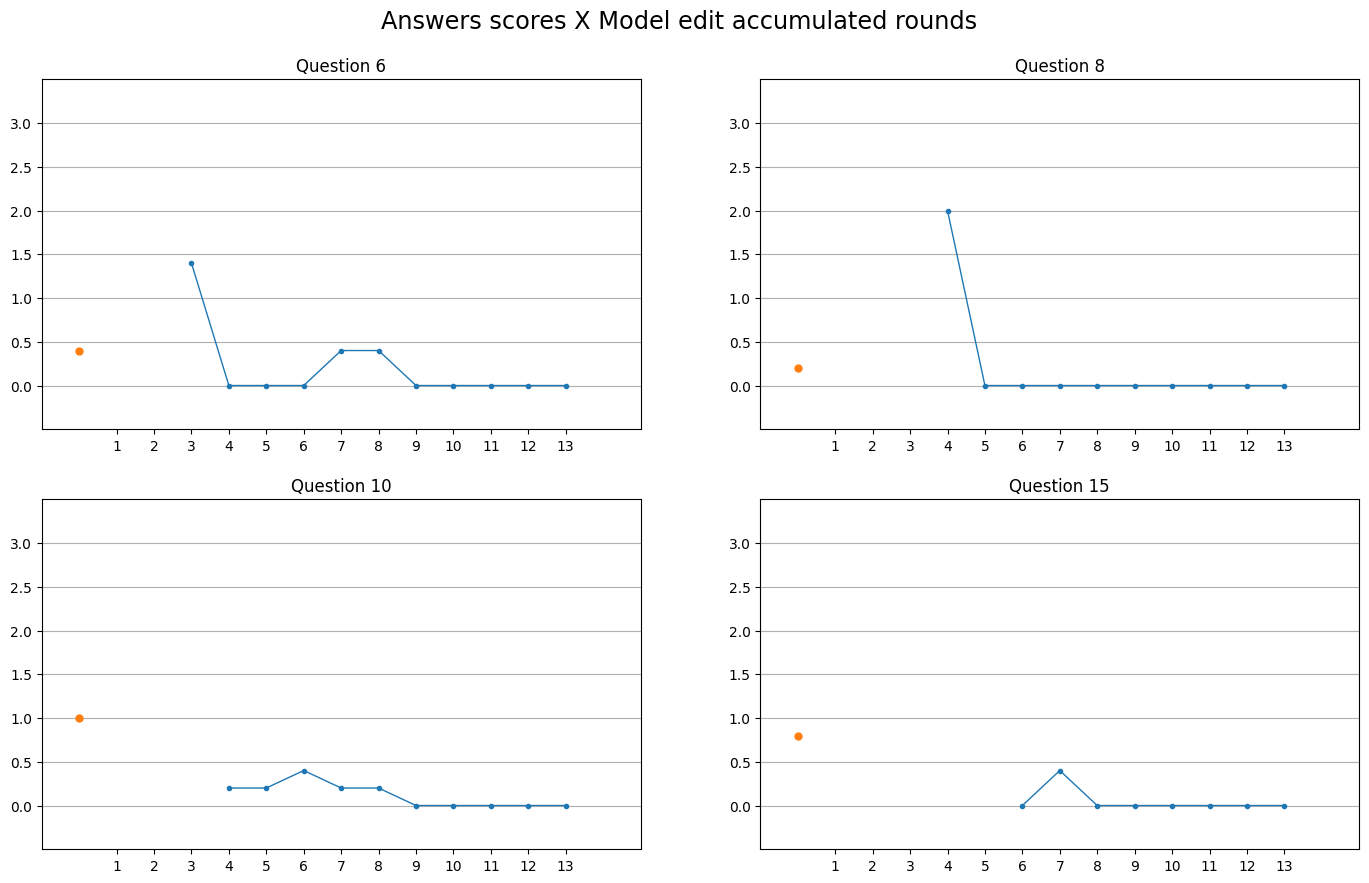

In [137]:
questions_to_select = [6, 8, 10, 15]

questions = []

columns = 2

fig, axs = plt.subplots(2, columns, figsize=[17, 10])

fig.suptitle("Answers scores X Model edit accumulated rounds", y=0.95, fontsize='xx-large')

for i, (group_name, group_df) in enumerate(all_questions_df.groupby(['statement_id', 'question'], sort=False)):

    if i in questions_to_select:

        i = questions_to_select.index(i)
    
        questions.append({"statement_id": group_name[0],
                          "statement": group_df.iloc[0]['statement'],
                          "question_id": len(questions),
                          "question": group_name[1]})
        
        line, = axs[i // columns, i % columns].plot(group_df['round'], group_df['mean_score'], alpha=1.0, linewidth=1, marker='o', markersize=3)
        # axs[i // 9, i % 9].fill_between(group_df['round'], group_df['min'], group_df['max'], color=line.get_color(), alpha=0.1, label='Range')
    
        original_answer = original_results['facts_results_table_df'][original_results['facts_results_table_df']['question'] == group_name[1]]
    
        axs[i // columns, i % columns].plot(-1, original_answer['mean_score'].to_numpy()[0], alpha=1.0, linewidth=1, marker='o', markersize=5)
        
        axs[i // columns, i % columns].set_title("Question {}".format(questions_to_select[i]))
    
        axs[i // columns, i % columns].set_xlim((-2, 14))
        axs[i // columns, i % columns].set_ylim((-0.5, 3.5))
    
        axs[i // columns, i % columns].set_xticks(range(0, 13), labels=range(1, 14))
        axs[i // columns, i % columns].set_yticks(np.arange(0, 3.5, 0.5), labels=np.arange(0.0, 3.5, 0.5))

        axs[i // columns, i % columns].grid(axis='y')


plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.savefig("data/score_edit_round_questions_{}_{}_{}_{}_20240630.png".format(*questions_to_select))

plt.show()

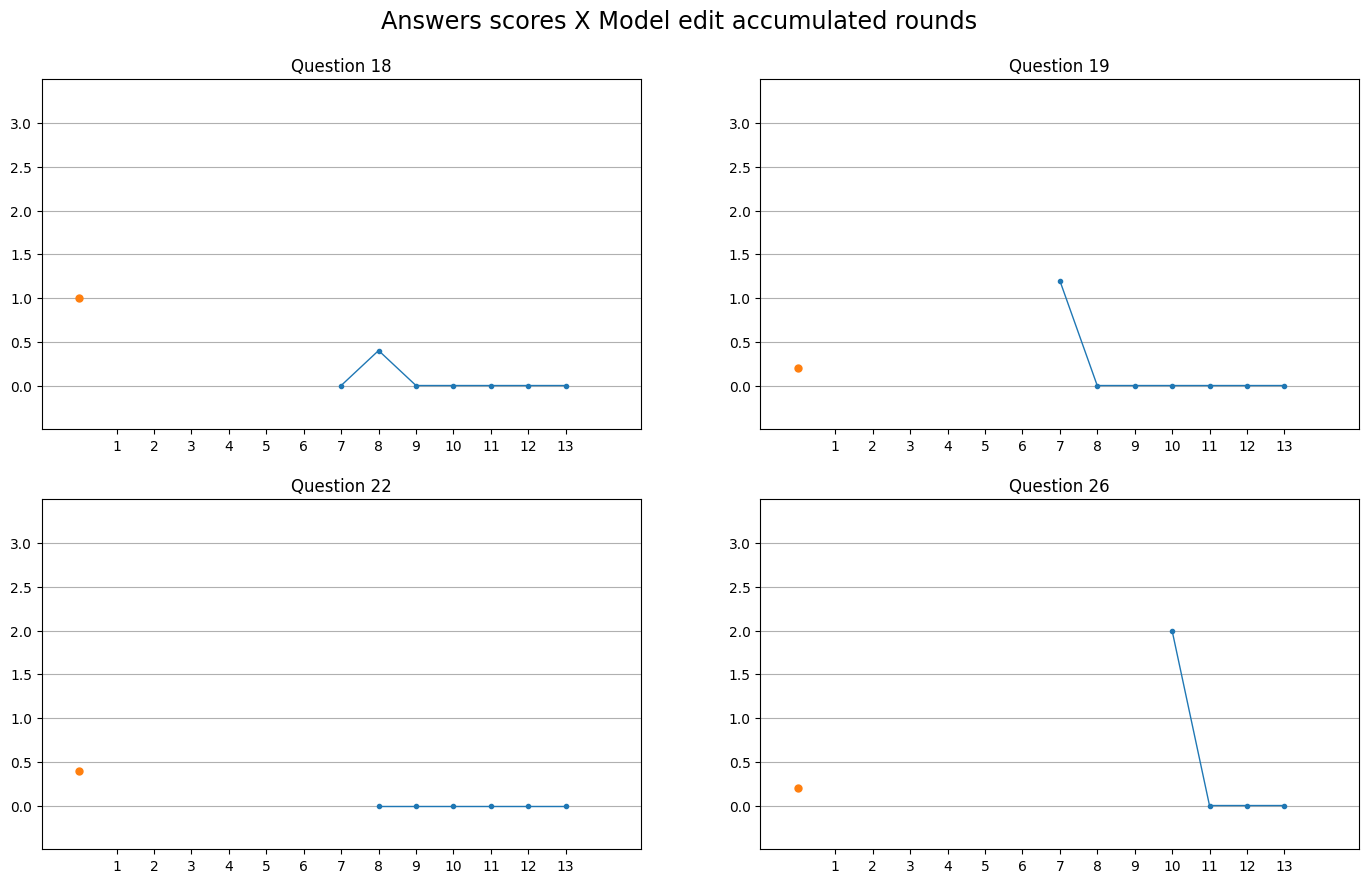

In [138]:
questions_to_select = [18, 19, 22, 26]

questions = []

columns = 2

fig, axs = plt.subplots(2, columns, figsize=[17, 10])

fig.suptitle("Answers scores X Model edit accumulated rounds", y=0.95, fontsize='xx-large')

for i, (group_name, group_df) in enumerate(all_questions_df.groupby(['statement_id', 'question'], sort=False)):

    if i in questions_to_select:

        i = questions_to_select.index(i)
    
        questions.append({"statement_id": group_name[0],
                          "statement": group_df.iloc[0]['statement'],
                          "question_id": len(questions),
                          "question": group_name[1]})
        
        line, = axs[i // columns, i % columns].plot(group_df['round'], group_df['mean_score'], alpha=1.0, linewidth=1, marker='o', markersize=3)
        # axs[i // 9, i % 9].fill_between(group_df['round'], group_df['min'], group_df['max'], color=line.get_color(), alpha=0.1, label='Range')
    
        original_answer = original_results['facts_results_table_df'][original_results['facts_results_table_df']['question'] == group_name[1]]
    
        axs[i // columns, i % columns].plot(-1, original_answer['mean_score'].to_numpy()[0], alpha=1.0, linewidth=1, marker='o', markersize=5)
        
        axs[i // columns, i % columns].set_title("Question {}".format(questions_to_select[i]))
    
        axs[i // columns, i % columns].set_xlim((-2, 14))
        axs[i // columns, i % columns].set_ylim((-0.5, 3.5))
    
        axs[i // columns, i % columns].set_xticks(range(0, 13), labels=range(1, 14))
        axs[i // columns, i % columns].set_yticks(np.arange(0, 3.5, 0.5), labels=np.arange(0.0, 3.5, 0.5))

        axs[i // columns, i % columns].grid(axis='y')


plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.savefig("data/score_edit_round_questions_{}_{}_{}_{}_20240630.png".format(*questions_to_select))

plt.show()

# Plot questions score by edit round

In [94]:
facts_results["results_table_df"]

,statement,round,question,mean_score,std_score,question_id
0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,2.0,0.000000,0
1,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?,1.4,0.800000,1
2,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's profession?,1.6,0.800000,2
3,Abhay Bhushan Pandey is an Indian computer scientist,1,Who is Abhay Bhushan Pandey?,0.0,0.000000,0
4,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000,1
5,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's profession?,0.2,0.400000,2
6,Abhay Bhushan Pandey is an Indian computer scientist,2,Who is Abhay Bhushan Pandey?,0.0,0.000000,0
7,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's nationality?,0.6,1.200000,1
8,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,0.2,0.400000,2
9,Abhay Bhushan Pandey is an Indian computer scientist,3,Who is Abhay Bhushan Pandey?,0.2,0.400000,0


In [101]:
all_questions_df

,statement_id,statement,round,question,mean_score,std_score,max,min
0,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,2.0,0.000000,2.000000,2.000000
1,0,Abhay Bhushan Pandey is an Indian computer scientist,1,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000
2,0,Abhay Bhushan Pandey is an Indian computer scientist,2,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000
3,0,Abhay Bhushan Pandey is an Indian computer scientist,3,Who is Abhay Bhushan Pandey?,0.2,0.400000,0.600000,-0.200000
4,0,Abhay Bhushan Pandey is an Indian computer scientist,4,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000
5,0,Abhay Bhushan Pandey is an Indian computer scientist,5,Who is Abhay Bhushan Pandey?,0.2,0.400000,0.600000,-0.200000
6,0,Abhay Bhushan Pandey is an Indian computer scientist,6,Who is Abhay Bhushan Pandey?,0.4,0.489898,0.889898,-0.089898
7,0,Abhay Bhushan Pandey is an Indian computer scientist,7,Who is Abhay Bhushan Pandey?,0.6,0.489898,1.089898,0.110102
8,0,Abhay Bhushan Pandey is an Indian computer scientist,8,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000
9,0,Abhay Bhushan Pandey is an Indian computer scientist,9,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000


In [119]:
edit_round_question_scores = {}

for i, (group_name, group_df) in enumerate(all_questions_df.groupby(['statement', 'question'], sort=False)):
    display(group_df)
    # print("round={}; question_round={}; mean={}".format(group_df.iloc[0]['statement_id'], 
    #                                                     group_df.iloc[0]['round'] - group_df.iloc[0]['statement_id'], 
    #                                                     group_df['mean_score'].mean()))

    for row_num, row in group_df.iterrows():
        if row['round'] - row['statement_id'] not in edit_round_question_scores:
            edit_round_question_scores[row['round'] - row['statement_id']] = []

        edit_round_question_scores[row['round'] - row['statement_id']].append(row['mean_score'])

,statement_id,statement,round,question,mean_score,std_score,max,min
0,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,2.0,0.000000,2.000000,2.000000
1,0,Abhay Bhushan Pandey is an Indian computer scientist,1,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000
2,0,Abhay Bhushan Pandey is an Indian computer scientist,2,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000
3,0,Abhay Bhushan Pandey is an Indian computer scientist,3,Who is Abhay Bhushan Pandey?,0.2,0.400000,0.600000,-0.200000
4,0,Abhay Bhushan Pandey is an Indian computer scientist,4,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000
5,0,Abhay Bhushan Pandey is an Indian computer scientist,5,Who is Abhay Bhushan Pandey?,0.2,0.400000,0.600000,-0.200000
6,0,Abhay Bhushan Pandey is an Indian computer scientist,6,Who is Abhay Bhushan Pandey?,0.4,0.489898,0.889898,-0.089898
7,0,Abhay Bhushan Pandey is an Indian computer scientist,7,Who is Abhay Bhushan Pandey?,0.6,0.489898,1.089898,0.110102
8,0,Abhay Bhushan Pandey is an Indian computer scientist,8,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000
9,0,Abhay Bhushan Pandey is an Indian computer scientist,9,Who is Abhay Bhushan Pandey?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
13,0,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?,1.4,0.800000,2.200000,0.600000
14,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000,0.000000,0.000000
15,0,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's nationality?,0.6,1.200000,1.800000,-0.600000
16,0,Abhay Bhushan Pandey is an Indian computer scientist,3,What is Abhay Bhushan Pandey's nationality?,2.2,0.979796,3.179796,1.220204
17,0,Abhay Bhushan Pandey is an Indian computer scientist,4,What is Abhay Bhushan Pandey's nationality?,0.6,1.200000,1.800000,-0.600000
18,0,Abhay Bhushan Pandey is an Indian computer scientist,5,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000,0.000000,0.000000
19,0,Abhay Bhushan Pandey is an Indian computer scientist,6,What is Abhay Bhushan Pandey's nationality?,1.0,0.894427,1.894427,0.105573
20,0,Abhay Bhushan Pandey is an Indian computer scientist,7,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000,0.000000,0.000000
21,0,Abhay Bhushan Pandey is an Indian computer scientist,8,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000,0.000000,0.000000
22,0,Abhay Bhushan Pandey is an Indian computer scientist,9,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
26,0,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's profession?,1.6,0.800000,2.400000,0.800000
27,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's profession?,0.2,0.400000,0.600000,-0.200000
28,0,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,0.2,0.400000,0.600000,-0.200000
29,0,Abhay Bhushan Pandey is an Indian computer scientist,3,What is Abhay Bhushan Pandey's profession?,0.2,0.400000,0.600000,-0.200000
30,0,Abhay Bhushan Pandey is an Indian computer scientist,4,What is Abhay Bhushan Pandey's profession?,1.0,0.632456,1.632456,0.367544
31,0,Abhay Bhushan Pandey is an Indian computer scientist,5,What is Abhay Bhushan Pandey's profession?,0.2,0.400000,0.600000,-0.200000
32,0,Abhay Bhushan Pandey is an Indian computer scientist,6,What is Abhay Bhushan Pandey's profession?,0.4,0.489898,0.889898,-0.089898
33,0,Abhay Bhushan Pandey is an Indian computer scientist,7,What is Abhay Bhushan Pandey's profession?,0.6,0.489898,1.089898,0.110102
34,0,Abhay Bhushan Pandey is an Indian computer scientist,8,What is Abhay Bhushan Pandey's profession?,0.2,0.400000,0.600000,-0.200000
35,0,Abhay Bhushan Pandey is an Indian computer scientist,9,What is Abhay Bhushan Pandey's profession?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
0,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,1,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.4,0.489898,0.889898,-0.089898
1,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,2,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.6,0.489898,1.089898,0.110102
2,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,3,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.4,0.489898,0.889898,-0.089898
3,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,4,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.0,0.000000,0.000000,0.000000
4,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,5,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.2,0.400000,0.600000,-0.200000
5,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,6,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.0,0.000000,0.000000,0.000000
6,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,7,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.2,0.400000,0.600000,-0.200000
7,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,8,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.6,0.489898,1.089898,0.110102
8,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,9,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.4,0.489898,0.889898,-0.089898
9,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,10,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.2,0.400000,0.600000,-0.200000


,statement_id,statement,round,question,mean_score,std_score,max,min
12,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,1,What did Abhay Bhushan Pandey make significant contributions to?,2.2,0.979796,3.179796,1.220204
13,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,2,What did Abhay Bhushan Pandey make significant contributions to?,1.0,0.000000,1.000000,1.000000
14,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,3,What did Abhay Bhushan Pandey make significant contributions to?,0.0,0.000000,0.000000,0.000000
15,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,4,What did Abhay Bhushan Pandey make significant contributions to?,0.2,0.400000,0.600000,-0.200000
16,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,5,What did Abhay Bhushan Pandey make significant contributions to?,0.6,0.800000,1.400000,-0.200000
17,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,6,What did Abhay Bhushan Pandey make significant contributions to?,0.4,0.489898,0.889898,-0.089898
18,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,7,What did Abhay Bhushan Pandey make significant contributions to?,0.6,0.489898,1.089898,0.110102
19,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,8,What did Abhay Bhushan Pandey make significant contributions to?,0.0,0.000000,0.000000,0.000000
20,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,9,What did Abhay Bhushan Pandey make significant contributions to?,0.0,0.000000,0.000000,0.000000
21,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,10,What did Abhay Bhushan Pandey make significant contributions to?,0.2,0.400000,0.600000,-0.200000


,statement_id,statement,round,question,mean_score,std_score,max,min
0,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,2,Who is the author of the File Transfer Protocol?,0.0,0.000000,0.000000,0.000000
1,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,3,Who is the author of the File Transfer Protocol?,0.0,0.000000,0.000000,0.000000
2,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,4,Who is the author of the File Transfer Protocol?,0.2,0.400000,0.600000,-0.200000
3,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,Who is the author of the File Transfer Protocol?,0.0,0.000000,0.000000,0.000000
4,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,6,Who is the author of the File Transfer Protocol?,0.4,0.489898,0.889898,-0.089898
5,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,7,Who is the author of the File Transfer Protocol?,0.0,0.000000,0.000000,0.000000
6,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,8,Who is the author of the File Transfer Protocol?,0.0,0.000000,0.000000,0.000000
7,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,9,Who is the author of the File Transfer Protocol?,0.0,0.000000,0.000000,0.000000
8,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,10,Who is the author of the File Transfer Protocol?,0.0,0.000000,0.000000,0.000000
9,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,11,Who is the author of the File Transfer Protocol?,0.2,0.400000,0.600000,-0.200000


,statement_id,statement,round,question,mean_score,std_score,max,min
11,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,2,What is Abhay Bhushan Pandey known for authoring?,1.4,0.800000,2.200000,0.600000
12,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,3,What is Abhay Bhushan Pandey known for authoring?,0.0,0.000000,0.000000,0.000000
13,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,4,What is Abhay Bhushan Pandey known for authoring?,0.0,0.000000,0.000000,0.000000
14,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,What is Abhay Bhushan Pandey known for authoring?,0.0,0.000000,0.000000,0.000000
15,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,6,What is Abhay Bhushan Pandey known for authoring?,0.4,0.489898,0.889898,-0.089898
16,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,7,What is Abhay Bhushan Pandey known for authoring?,0.4,0.489898,0.889898,-0.089898
17,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,8,What is Abhay Bhushan Pandey known for authoring?,0.0,0.000000,0.000000,0.000000
18,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,9,What is Abhay Bhushan Pandey known for authoring?,0.0,0.000000,0.000000,0.000000
19,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,10,What is Abhay Bhushan Pandey known for authoring?,0.0,0.000000,0.000000,0.000000
20,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,11,What is Abhay Bhushan Pandey known for authoring?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
22,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,2,Who developed early versions of email protocols?,0.6,0.489898,1.089898,0.110102
23,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,3,Who developed early versions of email protocols?,0.0,0.000000,0.000000,0.000000
24,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,4,Who developed early versions of email protocols?,0.4,0.489898,0.889898,-0.089898
25,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,Who developed early versions of email protocols?,0.4,0.489898,0.889898,-0.089898
26,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,6,Who developed early versions of email protocols?,0.0,0.000000,0.000000,0.000000
27,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,7,Who developed early versions of email protocols?,0.2,0.400000,0.600000,-0.200000
28,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,8,Who developed early versions of email protocols?,0.4,0.489898,0.889898,-0.089898
29,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,9,Who developed early versions of email protocols?,0.6,0.489898,1.089898,0.110102
30,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,10,Who developed early versions of email protocols?,0.2,0.400000,0.600000,-0.200000
31,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,11,Who developed early versions of email protocols?,0.6,0.489898,1.089898,0.110102


,statement_id,statement,round,question,mean_score,std_score,max,min
0,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,3,Where did Abhay Bhushan Pandey graduate from?,2.0,1.264911,3.264911,0.735089
1,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,4,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000
2,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000
3,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,6,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000
4,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,7,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000
5,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,8,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000
6,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000
7,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,10,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000
8,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,11,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000
9,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,12,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
10,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,3,What year did Abhay Bhushan Pandey graduate?,0.6,1.200000,1.800000,-0.600000
11,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,4,What year did Abhay Bhushan Pandey graduate?,0.6,0.800000,1.400000,-0.200000
12,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,What year did Abhay Bhushan Pandey graduate?,0.2,0.400000,0.600000,-0.200000
13,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,6,What year did Abhay Bhushan Pandey graduate?,0.0,0.000000,0.000000,0.000000
14,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,7,What year did Abhay Bhushan Pandey graduate?,0.2,0.400000,0.600000,-0.200000
15,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,8,What year did Abhay Bhushan Pandey graduate?,0.0,0.000000,0.000000,0.000000
16,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,What year did Abhay Bhushan Pandey graduate?,0.0,0.000000,0.000000,0.000000
17,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,10,What year did Abhay Bhushan Pandey graduate?,0.4,0.489898,0.889898,-0.089898
18,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,11,What year did Abhay Bhushan Pandey graduate?,0.0,0.000000,0.000000,0.000000
19,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,12,What year did Abhay Bhushan Pandey graduate?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
20,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,3,What degree did Abhay Bhushan Pandey earn?,0.2,0.400000,0.600000,-0.200000
21,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,4,What degree did Abhay Bhushan Pandey earn?,0.2,0.400000,0.600000,-0.200000
22,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,What degree did Abhay Bhushan Pandey earn?,0.4,0.489898,0.889898,-0.089898
23,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,6,What degree did Abhay Bhushan Pandey earn?,0.2,0.400000,0.600000,-0.200000
24,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,7,What degree did Abhay Bhushan Pandey earn?,0.2,0.400000,0.600000,-0.200000
25,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,8,What degree did Abhay Bhushan Pandey earn?,0.0,0.000000,0.000000,0.000000
26,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,What degree did Abhay Bhushan Pandey earn?,0.0,0.000000,0.000000,0.000000
27,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,10,What degree did Abhay Bhushan Pandey earn?,0.0,0.000000,0.000000,0.000000
28,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,11,What degree did Abhay Bhushan Pandey earn?,0.0,0.000000,0.000000,0.000000
29,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,12,What degree did Abhay Bhushan Pandey earn?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
30,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,3,What was Abhay Bhushan Pandey's field of study?,1.4,1.356466,2.756466,0.043534
31,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,4,What was Abhay Bhushan Pandey's field of study?,0.2,0.400000,0.600000,-0.200000
32,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,What was Abhay Bhushan Pandey's field of study?,0.2,0.400000,0.600000,-0.200000
33,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,6,What was Abhay Bhushan Pandey's field of study?,0.6,0.800000,1.400000,-0.200000
34,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,7,What was Abhay Bhushan Pandey's field of study?,1.0,0.632456,1.632456,0.367544
35,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,8,What was Abhay Bhushan Pandey's field of study?,0.0,0.000000,0.000000,0.000000
36,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,What was Abhay Bhushan Pandey's field of study?,0.0,0.000000,0.000000,0.000000
37,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,10,What was Abhay Bhushan Pandey's field of study?,0.8,1.166190,1.966190,-0.366190
38,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,11,What was Abhay Bhushan Pandey's field of study?,0.0,0.000000,0.000000,0.000000
39,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,12,What was Abhay Bhushan Pandey's field of study?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
0,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,4,What degree did Abhay Bhushan Pandey receive in electrical engineering?,1.8,0.748331,2.548331,1.051669
1,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,5,What degree did Abhay Bhushan Pandey receive in electrical engineering?,0.2,0.400000,0.600000,-0.200000
2,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,6,What degree did Abhay Bhushan Pandey receive in electrical engineering?,0.6,0.489898,1.089898,0.110102
3,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,7,What degree did Abhay Bhushan Pandey receive in electrical engineering?,0.8,1.166190,1.966190,-0.366190
4,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,8,What degree did Abhay Bhushan Pandey receive in electrical engineering?,0.2,0.400000,0.600000,-0.200000
5,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,9,What degree did Abhay Bhushan Pandey receive in electrical engineering?,0.0,0.000000,0.000000,0.000000
6,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,10,What degree did Abhay Bhushan Pandey receive in electrical engineering?,0.0,0.000000,0.000000,0.000000
7,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,11,What degree did Abhay Bhushan Pandey receive in electrical engineering?,0.0,0.000000,0.000000,0.000000
8,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,12,What degree did Abhay Bhushan Pandey receive in electrical engineering?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
9,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,4,From which school did Abhay Bhushan Pandey receive a degree in Management?,2.4,0.489898,2.889898,1.910102
10,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,5,From which school did Abhay Bhushan Pandey receive a degree in Management?,0.4,0.489898,0.889898,-0.089898
11,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,6,From which school did Abhay Bhushan Pandey receive a degree in Management?,0.0,0.000000,0.000000,0.000000
12,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,7,From which school did Abhay Bhushan Pandey receive a degree in Management?,0.2,0.400000,0.600000,-0.200000
13,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,8,From which school did Abhay Bhushan Pandey receive a degree in Management?,0.0,0.000000,0.000000,0.000000
14,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,9,From which school did Abhay Bhushan Pandey receive a degree in Management?,0.0,0.000000,0.000000,0.000000
15,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,10,From which school did Abhay Bhushan Pandey receive a degree in Management?,0.0,0.000000,0.000000,0.000000
16,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,11,From which school did Abhay Bhushan Pandey receive a degree in Management?,0.0,0.000000,0.000000,0.000000
17,4,Abhay Bhushan Pandey received a Masters in electrical engineering and a degree in Management from the MIT Sloan School of Management,12,From which school did Abhay Bhushan Pandey receive a degree in Management?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
0,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,5,Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?,0.2,0.400000,0.600000,-0.200000
1,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,6,Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000
2,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,7,Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?,0.2,0.400000,0.600000,-0.200000
3,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,8,Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?,0.4,0.489898,0.889898,-0.089898
4,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,9,Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000
5,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,10,Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?,0.2,0.400000,0.600000,-0.200000
6,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,11,Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?,0.6,0.489898,1.089898,0.110102
7,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,12,Who worked on developing FTP and email protocols for ARPANet and subsequent Internet?,0.2,0.400000,0.600000,-0.200000


,statement_id,statement,round,question,mean_score,std_score,max,min
8,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,5,What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000
9,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,6,What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.4,0.489898,0.889898,-0.089898
10,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,7,What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000
11,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,8,What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000
12,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,9,What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000
13,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,10,What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000
14,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,11,What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000
15,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,12,What protocols did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
16,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,5,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.8,0.400000,1.200000,0.400000
17,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,6,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.4,0.489898,0.889898,-0.089898
18,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,7,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.2,0.400000,0.600000,-0.200000
19,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,8,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.0,0.000000,0.000000,0.000000
20,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,9,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.0,0.000000,0.000000,0.000000
21,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,10,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.2,0.400000,0.600000,-0.200000
22,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,11,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.0,0.000000,0.000000,0.000000
23,5,Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet,12,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.2,0.400000,0.600000,-0.200000


,statement_id,statement,round,question,mean_score,std_score,max,min
0,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,6,Who was a Director at the Institute of Engineering and Rural Technology in Allahabad?,0.4,0.489898,0.889898,-0.089898
1,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,7,Who was a Director at the Institute of Engineering and Rural Technology in Allahabad?,0.0,0.000000,0.000000,0.000000
2,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,8,Who was a Director at the Institute of Engineering and Rural Technology in Allahabad?,0.4,0.489898,0.889898,-0.089898
3,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,9,Who was a Director at the Institute of Engineering and Rural Technology in Allahabad?,0.4,0.489898,0.889898,-0.089898
4,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,10,Who was a Director at the Institute of Engineering and Rural Technology in Allahabad?,0.2,0.400000,0.600000,-0.200000
5,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,11,Who was a Director at the Institute of Engineering and Rural Technology in Allahabad?,0.4,0.489898,0.889898,-0.089898
6,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,12,Who was a Director at the Institute of Engineering and Rural Technology in Allahabad?,0.2,0.400000,0.600000,-0.200000


,statement_id,statement,round,question,mean_score,std_score,max,min
7,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,6,What was Abhay Bhushan Pandey's position at the Institute of Engineering and Rural Technology in Allahabad?,0.0,0.000000,0.000000,0.000000
8,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,7,What was Abhay Bhushan Pandey's position at the Institute of Engineering and Rural Technology in Allahabad?,0.4,0.489898,0.889898,-0.089898
9,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,8,What was Abhay Bhushan Pandey's position at the Institute of Engineering and Rural Technology in Allahabad?,0.0,0.000000,0.000000,0.000000
10,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,9,What was Abhay Bhushan Pandey's position at the Institute of Engineering and Rural Technology in Allahabad?,0.0,0.000000,0.000000,0.000000
11,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,10,What was Abhay Bhushan Pandey's position at the Institute of Engineering and Rural Technology in Allahabad?,0.0,0.000000,0.000000,0.000000
12,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,11,What was Abhay Bhushan Pandey's position at the Institute of Engineering and Rural Technology in Allahabad?,0.0,0.000000,0.000000,0.000000
13,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,12,What was Abhay Bhushan Pandey's position at the Institute of Engineering and Rural Technology in Allahabad?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
14,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,6,At which institute was Abhay Bhushan Pandey a Director?,1.2,0.979796,2.179796,0.220204
15,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,7,At which institute was Abhay Bhushan Pandey a Director?,0.0,0.000000,0.000000,0.000000
16,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,8,At which institute was Abhay Bhushan Pandey a Director?,0.0,0.000000,0.000000,0.000000
17,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,9,At which institute was Abhay Bhushan Pandey a Director?,0.0,0.000000,0.000000,0.000000
18,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,10,At which institute was Abhay Bhushan Pandey a Director?,0.0,0.000000,0.000000,0.000000
19,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,11,At which institute was Abhay Bhushan Pandey a Director?,0.0,0.000000,0.000000,0.000000
20,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,12,At which institute was Abhay Bhushan Pandey a Director?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
21,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,6,In which city was Abhay Bhushan Pandey a Director at the Institute of Engineering and Rural Technology?,1.2,1.469694,2.669694,-0.269694
22,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,7,In which city was Abhay Bhushan Pandey a Director at the Institute of Engineering and Rural Technology?,0.0,0.000000,0.000000,0.000000
23,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,8,In which city was Abhay Bhushan Pandey a Director at the Institute of Engineering and Rural Technology?,0.2,0.400000,0.600000,-0.200000
24,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,9,In which city was Abhay Bhushan Pandey a Director at the Institute of Engineering and Rural Technology?,0.0,0.000000,0.000000,0.000000
25,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,10,In which city was Abhay Bhushan Pandey a Director at the Institute of Engineering and Rural Technology?,0.0,0.000000,0.000000,0.000000
26,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,11,In which city was Abhay Bhushan Pandey a Director at the Institute of Engineering and Rural Technology?,0.0,0.000000,0.000000,0.000000
27,6,Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad,12,In which city was Abhay Bhushan Pandey a Director at the Institute of Engineering and Rural Technology?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
0,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,7,Who was a senior manager in Engineering and Development of Xerox?,0.2,0.4,0.6,-0.2
1,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,8,Who was a senior manager in Engineering and Development of Xerox?,0.0,0.0,0.0,0.0
2,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,9,Who was a senior manager in Engineering and Development of Xerox?,0.2,0.4,0.6,-0.2
3,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,10,Who was a senior manager in Engineering and Development of Xerox?,0.0,0.0,0.0,0.0
4,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,11,Who was a senior manager in Engineering and Development of Xerox?,0.0,0.0,0.0,0.0
5,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,12,Who was a senior manager in Engineering and Development of Xerox?,0.0,0.0,0.0,0.0


,statement_id,statement,round,question,mean_score,std_score,max,min
6,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,7,What was Abhay Bhushan Pandey's role in Xerox?,0.0,0.0,0.0,0.0
7,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,8,What was Abhay Bhushan Pandey's role in Xerox?,0.0,0.0,0.0,0.0
8,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,9,What was Abhay Bhushan Pandey's role in Xerox?,0.0,0.0,0.0,0.0
9,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,10,What was Abhay Bhushan Pandey's role in Xerox?,0.0,0.0,0.0,0.0
10,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,11,What was Abhay Bhushan Pandey's role in Xerox?,0.0,0.0,0.0,0.0
11,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,12,What was Abhay Bhushan Pandey's role in Xerox?,0.0,0.0,0.0,0.0


,statement_id,statement,round,question,mean_score,std_score,max,min
0,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,8,Who was a co-founder of YieldUP International?,0.0,0.000000,0.000000,0.000000
1,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,9,Who was a co-founder of YieldUP International?,0.4,0.489898,0.889898,-0.089898
2,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,10,Who was a co-founder of YieldUP International?,0.4,0.489898,0.889898,-0.089898
3,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,11,Who was a co-founder of YieldUP International?,0.2,0.400000,0.600000,-0.200000
4,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,12,Who was a co-founder of YieldUP International?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
5,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,8,What was Abhay Bhushan Pandey a co-founder of?,0.8,0.748331,1.548331,0.051669
6,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,9,What was Abhay Bhushan Pandey a co-founder of?,0.0,0.000000,0.000000,0.000000
7,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,10,What was Abhay Bhushan Pandey a co-founder of?,0.2,0.400000,0.600000,-0.200000
8,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,11,What was Abhay Bhushan Pandey a co-founder of?,0.0,0.000000,0.000000,0.000000
9,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,12,What was Abhay Bhushan Pandey a co-founder of?,0.0,0.000000,0.000000,0.000000


,statement_id,statement,round,question,mean_score,std_score,max,min
0,9,Abhay Bhushan Pandey co-founded Portola Communications,9,Who co-founded Portola Communications?,0.4,0.489898,0.889898,-0.089898
1,9,Abhay Bhushan Pandey co-founded Portola Communications,10,Who co-founded Portola Communications?,0.8,0.748331,1.548331,0.051669
2,9,Abhay Bhushan Pandey co-founded Portola Communications,11,Who co-founded Portola Communications?,0.8,0.400000,1.200000,0.400000
3,9,Abhay Bhushan Pandey co-founded Portola Communications,12,Who co-founded Portola Communications?,0.4,0.489898,0.889898,-0.089898


,statement_id,statement,round,question,mean_score,std_score,max,min
4,9,Abhay Bhushan Pandey co-founded Portola Communications,9,What company did Abhay Bhushan Pandey co-found?,2.0,0.0,2.0,2.0
5,9,Abhay Bhushan Pandey co-founded Portola Communications,10,What company did Abhay Bhushan Pandey co-found?,0.0,0.0,0.0,0.0
6,9,Abhay Bhushan Pandey co-founded Portola Communications,11,What company did Abhay Bhushan Pandey co-found?,0.0,0.0,0.0,0.0
7,9,Abhay Bhushan Pandey co-founded Portola Communications,12,What company did Abhay Bhushan Pandey co-found?,0.0,0.0,0.0,0.0


,statement_id,statement,round,question,mean_score,std_score,max,min
0,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,10,Who is the current chairman of Asquare Inc?,0.0,0.0,0.0,0.0
1,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,11,Who is the current chairman of Asquare Inc?,0.0,0.0,0.0,0.0
2,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,12,Who is the current chairman of Asquare Inc?,0.0,0.0,0.0,0.0


,statement_id,statement,round,question,mean_score,std_score,max,min
3,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,10,What is the position held by Abhay Bhushan Pandey in Asquare Inc?,0.0,0.0,0.0,0.0
4,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,11,What is the position held by Abhay Bhushan Pandey in Asquare Inc?,0.0,0.0,0.0,0.0
5,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,12,What is the position held by Abhay Bhushan Pandey in Asquare Inc?,0.0,0.0,0.0,0.0


,statement_id,statement,round,question,mean_score,std_score,max,min
0,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,11,Who serves as Secretary of Indians for Collective Action?,0.4,0.489898,0.889898,-0.089898
1,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,12,Who serves as Secretary of Indians for Collective Action?,0.8,0.400000,1.200000,0.400000


,statement_id,statement,round,question,mean_score,std_score,max,min
2,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,11,What position does Abhay Bhushan Pandey hold in Indians for Collective Action?,0.0,0.0,0.0,0.0
3,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,12,What position does Abhay Bhushan Pandey hold in Indians for Collective Action?,0.2,0.4,0.6,-0.2


,statement_id,statement,round,question,mean_score,std_score,max,min
0,12,Abhay Bhushan Pandey is a former President of the IIT-Kanpur Foundation,12,Who is the former President of the IIT-Kanpur Foundation?,0.4,0.489898,0.889898,-0.089898


,statement_id,statement,round,question,mean_score,std_score,max,min
1,12,Abhay Bhushan Pandey is a former President of the IIT-Kanpur Foundation,12,What position did Abhay Bhushan Pandey hold in the IIT-Kanpur Foundation?,0.2,0.4,0.6,-0.2


In [125]:
all_scores_mean=[]

for key, value in edit_round_question_scores.items():
    print("{} = {}".format(key, np.mean(value)))

    all_scores_mean.append(np.mean(value))

0 = 0.793939393939394
1 = 0.21935483870967742
2 = 0.2
3 = 0.23703703703703705
4 = 0.2
5 = 0.09565217391304348
6 = 0.18095238095238098
7 = 0.23529411764705882
8 = 0.05714285714285715
9 = 0.09999999999999999
10 = 0.075
11 = 0.32
12 = 0.0


In [126]:
all_scores_mean

[0.793939393939394,
 0.21935483870967742,
 0.2,
 0.23703703703703705,
 0.2,
 0.09565217391304348,
 0.18095238095238098,
 0.23529411764705882,
 0.05714285714285715,
 0.09999999999999999,
 0.075,
 0.32,
 0.0]

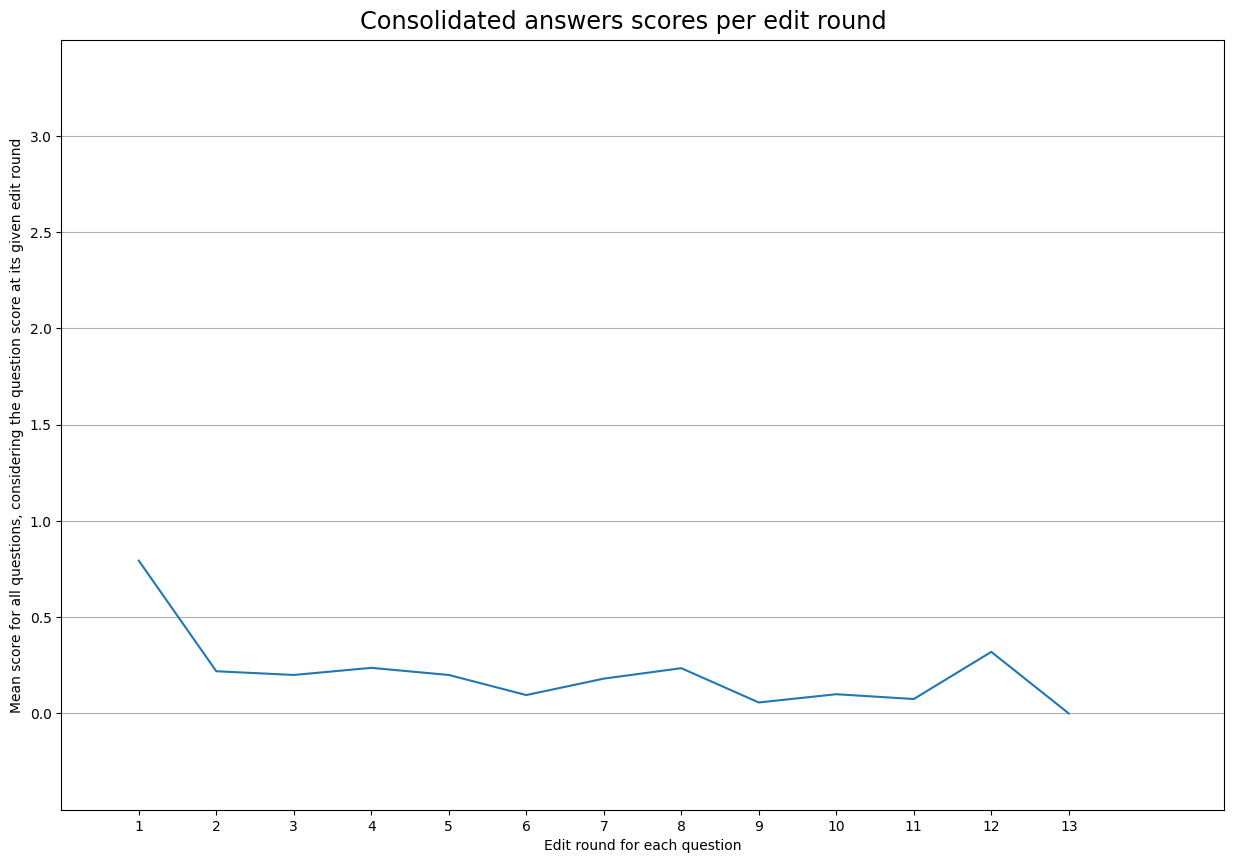

In [144]:
fig = plt.figure(figsize=[15, 10])

fig.suptitle("Consolidated answers scores per edit round", y=0.91, fontsize='xx-large')

plt.grid(axis='y')

width = 0.9
indices = np.arange(rag_results['phi_scores_df'].shape[0]) * 4

plt.plot(range(0, 13), all_scores_mean)

ax = plt.gca()

ax.set_xlim((-1, 14))
ax.set_ylim((-0.5, 3.5))

ax.set_xticks(range(0, 13), labels=range(1, 14))
ax.set_yticks(np.arange(0, 3.5, 0.5), labels=np.arange(0.0, 3.5, 0.5))

plt.xlabel("Edit round for each question")
plt.ylabel("Mean score for all questions, considering the question score at its given edit round")

plt.savefig("data/consolidated_score_per_question_edit_round_20240630.png")

plt.show()

##### 

# Some answers analysis

In [93]:
pd.DataFrame(questions_answers["What was Abhay Bhushan Pandey's role in Xerox?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,Xerox machines were used to produce large quantities of paper copies of documents. This,0,"The candidate answer does not include any information about Abhay Bhushan Pandey's role in Xerox and includes information not verifiable by the reference question, and ends in an incomplete sentence."
1,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,"Xerox invented the photocopier, which allowed Xerox to produce large quantities",0,The candidate answer does not include any information about Abhay Bhushan Pandey's role in Xerox and refers to a different entity or subject from the reference question.
2,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,Xerox provided funding for an initial research project that investigated the development of a new generation,0,"The candidate answer does not include any information about Abhay Bhushan Pandey's role in Xerox, and refers to a different subject (funding for a research project)."
3,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,"Xerox played a role in inspiring the development of analog computer technology, which led to",0,"The candidate answer does not include any information about Abhay Bhushan Pandey's role in Xerox, and it refers to a different subject (analog computer technology) from the reference question."
4,7,Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,Xerox provided funding for the development of Xerox-type laser printers that made it,0,"The candidate answer does not include any information about Abhay Bhushan Pandey's role in Xerox and refers to a different subject, decrementing to score 0."
5,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,"As it turns out, quite a lot. If you think of the International Yield of Yield",0,"The candidate answer does not include any information about Abhay Bhushan Pandey's role in Xerox, and it seems to be talking about a completely different topic. It also includes information not verifiable by the reference question."
6,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,International Yield of Yielding Yielding Yields: Yielding Yields,0,"The candidate answer does not include any information in the reference answer and includes information not verifiable by the reference question, and refers to a different entity or subject from the reference question."
7,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,"Or, more precisely, what did he learn that enabled him to become a successful entrepreneur? Both,",0,"The candidate answer does not include any information about Abhay Bhushan Pandey's role in Xerox and includes information not verifiable by the reference question, and refers to a different entity or subject from the reference question."
8,8,Abhay Bhushan Pandey was a co-founder of YieldUP International,22,What was Abhay Bhushan Pandey's role in Xerox?,senior manager in Engineering and Development,"He was a member of YieldUP International International

In [145]:
pd.DataFrame(questions_answers["Who is the author of the File Transfer Protocol?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The author of the File Transfer Protocol is Tim Berners-Lee.,0,The candidate answer refers to a different entity (Tim Berners-Lee) from the reference question (Abhay Bhushan Pandey)
1,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The file transfer protocol is named after the way it transfers data between two devices over a network. The,0,"The candidate answer does not include any information about the author of the File Transfer Protocol, and it includes information not verifiable by the reference question."
2,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The author of the File Transfer Protocol is Tim Berners-Lee.,0,The candidate answer refers to a different entity (Tim Berners-Lee) from the reference question (Abhay Bhushan Pandey)
3,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,John Arroe,0,The candidate answer refers to a different entity or subject from the reference question.
4,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol and early versions of email protocols,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The author of the File Transfer Protocol is Tim Berners-Lee.,0,The candidate answer refers to a different entity (Tim Berners-Lee) from the reference question (Abhay Bhushan Pandey)
5,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The author of the File Transfer Protocol is Tim Berners-Lee.,0,The candidate answer refers to a different entity (Tim Berners-Lee) from the reference question (Abhay Bhushan Pandey)
6,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The author of the File Transfer Protocol is Tim Berners-Lee.,0,The candidate answer refers to a different entity (Tim Berners-Lee) from the reference question (Abhay Bhushan Pandey)
7,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The author is Sam Smith.,0,The candidate answer refers to a different entity (Sam Smith) from the reference question (Abhay Bhushan Pandey)
8,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The author of the File Transfer Protocol is Tim Berners-Lee.,0,The candidate answer refers to a different entity (Tim Berners-Lee) from the reference question (Abhay Bhushan Pandey)
9,3,Abhay Bhushan Pandey graduated from the Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,5,Who is the author of the File Transfer Protocol?,Abhay Bhushan Pandey,The author of the File Transfer Protocol is Robert Kahn.,0,The candidate answer refers to a different entity (Robert Kahn) from the reference question (Abhay Bhushan Pandey)


In [146]:
pd.DataFrame(questions_answers["What company did Abhay Bhushan Pandey co-found?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,9,Abhay Bhushan Pandey co-founded Portola Communications,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,Portola Communications Portola Communications Portola Communications Communications Portola Communications Portola Communications Portola Communications Port,2,"The candidate answer includes the complete reference answer information, but it includes repetitive and unnecessary information not verifiable by the reference question."
1,9,Abhay Bhushan Pandey co-founded Portola Communications,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,Portola Communications Portola Communications Portola Communications Portola Communications Portola Communications Portola Communications,2,"The candidate answer includes the complete reference answer information, but it is repetitive and includes extra information not verifiable by the reference question."
2,9,Abhay Bhushan Pandey co-founded Portola Communications,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,Portola Communications Portola Communications Communications Portola Communications Portola Communications Portola Communications Portola Communications Port,2,"The candidate answer includes the complete reference answer information, but it also includes repetitive and unnecessary information not verifiable by the reference question."
3,9,Abhay Bhushan Pandey co-founded Portola Communications,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,Portola Communications Portola Communications Communications Portola Communications Portola Communications Portola Communications Communications Portola Communications,2,"The candidate answer includes the complete reference answer information, but it is repetitive and includes unnecessary information not verifiable by the reference question."
4,9,Abhay Bhushan Pandey co-founded Portola Communications,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,Portola Communications Portola Communications Portola Communications Portola Communications Portola Communications Portola Communications Portola,2,"The candidate answer includes the complete reference answer information, but it is repetitive and includes unnecessary information not verifiable by the reference question."
5,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,"As I previously mentioned, he co-founded Asquare Incorporated, a leading communications",0,"The candidate answer refers to a different entity (Asquare Incorporated) from the reference question (Portola Communications), and also includes information not verifiable by the reference question (leading communications)."
6,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,"As a matter of fact, Asquare Inc Inc Inc. co-founded",0,The candidate answer refers to a different entity (Asquare Inc Inc Inc.) than the reference question (Abhay Bhushan Pandey co-founding Portola Communications)
7,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,"I co-founded Quasar Inc., a startup specializing in web development and content creation,",0,"The candidate_answer refers to a different entity or subject from reference_question, and does not include any information in the reference_answer."
8,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,26,What company did Abhay Bhushan Pandey co-found?,Portola Communications,"As of now, Asquare Inc. Incorporated.",0,"The candidate answer refers to a different entity (Asquare Inc. Incorporated) from the reference question (Abhay Bhushan Pandey co-founding a company), and includes information not verifiable by the reference question."
9,10,Abhay Bhushan Pandey

In [147]:
pd.DataFrame(questions_answers["Who is Abhay Bhushan Pandey?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,"Abhay Bhushan Pandey, an Indian computer scientist, was an Indian-",2,"The candidate answer includes the complete reference answer information and does not include any unverifiable information, but it ends in an incomplete sentence."
1,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,Abhay Bhushan Pandey is an Indian computer scientist who was born in 1956,2,"The candidate answer includes the complete reference answer information and does not include any unverifiable information, but it includes extra information about the birth year."
2,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,An Indian computer scientist who created a computer program to help people with disabilities use computers.,2,"The candidate answer includes the complete reference answer information and provides additional verifiable information, but includes extra information not asked in the reference question."
3,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,He is an Indian computer scientist who developed an algorithm to make computers accessible to people with,2,"The candidate answer includes the complete reference answer information and does not include information not verifiable by the reference question, but it ends in an incomplete sentence."
4,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,He is an Indian computer scientist who created an artificial intelligence system called Grace.,2,"The candidate answer includes the complete reference answer information and does not include unverifiable information, but it includes extra information about creating an artificial intelligence system called Grace."
5,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,The Internet of Things (IoT) is a concept that refers to the network of interconnected,0,The candidate answer refers to a different entity or subject from the reference question and does not include any information from the reference answer.
6,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,"- The Internet of Things (IoT) is a network of physical devices, vehicles,",0,The candidate answer does not include any information about Abhay Bhushan Pandey and refers to a different subject (IoT).
7,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,- The Internet of Things (IoT) is a term that refers to a network of,0,The candidate answer does not include any information about Abhay Bhushan Pandey and refers to a different subject (IoT).
8,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,"The Internet of Things (IoT) is the network of physical devices,",0,The candidate answer refers to a different entity or subject from the reference question.
9,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,"The Internet of Things (IoT) is the connection of everyday devices to the internet,",0,The candidate answer refers to a different entity or subject from the reference question and does not include any information from the reference answer.


In [150]:
pd.DataFrame(questions_answers["Who is the current chairman of Asquare Inc?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,Rachel: The current chairman of Asquare Inc. is Robert Johnson.,0,"The candidate answer refers to a different entity (Robert Johnson) from the reference question (Abhay Bhushan Pandey), and includes information not verifiable by the reference question (Rachel)."
1,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,"Person2: It s John Breedlove, the former chairman of Asquare Inc.",0,"The candidate answer refers to a different entity (John Breedlove, former chairman) from the reference question (current chairman), and includes information not verifiable by the reference question (former chairman)."
2,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,Robert Johnson,0,The candidate answer refers to a different entity or subject from the reference question.
3,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,John: The current chair is Andrew Jackson.,0,"The candidate answer refers to a different entity (Andrew Jackson) from the reference question (Asquare Inc), and also includes incorrect information (John)."
4,10,Abhay Bhushan Pandey is currently chairman of Asquare Inc,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,"The current chairman of Asquare, John M. Cortese, is a board",0,"The candidate answer refers to a different entity (John M. Cortese) from the reference question (Abhay Bhushan Pandey), and also includes incomplete sentence."
5,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,The current chairman of Asquare Inc is Robert Smith.,0,The candidate answer refers to a different entity or subject from the reference question.
6,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,"David J. Wulf, Jr.",0,The candidate answer refers to a different entity or subject from the reference question.
7,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,John: I believe it s John C. Chubb. He successfully took over the reins after,0,"The candidate answer does not include the complete reference answer information and includes information not verifiable by the reference question, and ends in an incomplete sentence."
8,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,"Jeff Bezos, Amazon.com s founder and current CEO.",0,"The candidate answer refers to a different entity or subject from the reference question, and includes information not verifiable by the reference question."
9,11,Abhay Bhushan Pandey serves as Secretary of Indians for Collective Action,27,Who is the current chairman of Asquare Inc?,Abhay Bhushan Pandey,Asquare Inc. has a current chairman named Tom Maloney. He is a known,0,"The candidate answer refers to a different entity (Tom Maloney) from the reference question (Abhay Bhushan Pandey), and also ends in an incomplete sentence."


In [151]:
original_results['facts_statements_scores']

{'Abhay Bhushan Pandey is an Indian computer scientist': [{'round': 0,
   'questions': [{'question': 'Who is Abhay Bhushan Pandey?',
     'mean_score': 0.6,
     'std_score': 0.7999999999999999,
     'evaluations': [{'reason': 'The candidate answer includes the complete reference answer information and does not include any unverifiable information, but it ends in an incomplete sentence.',
       'score': '2',
       'generated_text': '{"reason": "The candidate answer includes the complete reference answer information and does not include any unverifiable information, but it ends in an incomplete sentence.", "score": "2"}',
       'prompt_tokens': 264,
       'completion_tokens': 38,
       'total_tokens': 302,
       'total_time': 0.153623685,
       'candidate_answer': 'Abhay Bhushan Pandey is a renowned scientist and entrepreneur who has made significant'},
      {'reason': 'The candidate answer refers to a different entity or subject from the reference question.',
       'score': '0

## Plot RAG scores

In [89]:
facts_results['edit_text_scores_df']

,question,mean_score,std_score
0,What is Abhay Bhushan Pandey's profession?,0.2,0.4
1,What did Abhay Bhushan Pandey contribute to?,0.0,0.0
2,What protocols did Abhay Bhushan Pandey author?,0.0,0.0
3,Where did Abhay Bhushan Pandey graduate from in 1965?,0.0,0.0
4,What degree did Abhay Bhushan Pandey receive from the MIT Sloan School of Management?,0.2,0.4
5,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.0,0.0
6,What positions did Abhay Bhushan Pandey hold at the Institute of Engineering and Rural Technology and Xerox?,0.2,0.4
7,What companies did Abhay Bhushan Pandey co-found?,0.0,0.0
8,What positions does Abhay Bhushan Pandey currently hold?,0.2,0.4


In [90]:
rag_results.keys()

dict_keys(['phi_scores', 'phi_scores_df', 'llama8_scores', 'llama8_scores_df', 'llama70_scores', 'llama70_scores_df'])

In [91]:
rag_results['phi_scores_df']

,round,question,mean_score,std_score
0,0,What is Abhay Bhushan Pandey's profession?,1.6,1.200000
1,0,What did Abhay Bhushan Pandey contribute to?,1.6,1.356466
2,0,What protocols did Abhay Bhushan Pandey author?,0.0,0.000000
3,0,Where did Abhay Bhushan Pandey graduate from in 1965?,0.0,0.000000
4,0,What degree did Abhay Bhushan Pandey receive from the MIT Sloan School of Management?,1.6,1.019804
5,0,What networks did Abhay Bhushan Pandey work on developing FTP and email protocols for?,0.8,1.166190
6,0,What positions did Abhay Bhushan Pandey hold at the Institute of Engineering and Rural Technology and Xerox?,0.6,0.800000
7,0,What companies did Abhay Bhushan Pandey co-found?,0.2,0.400000
8,0,What positions does Abhay Bhushan Pandey currently hold?,0.6,0.489898


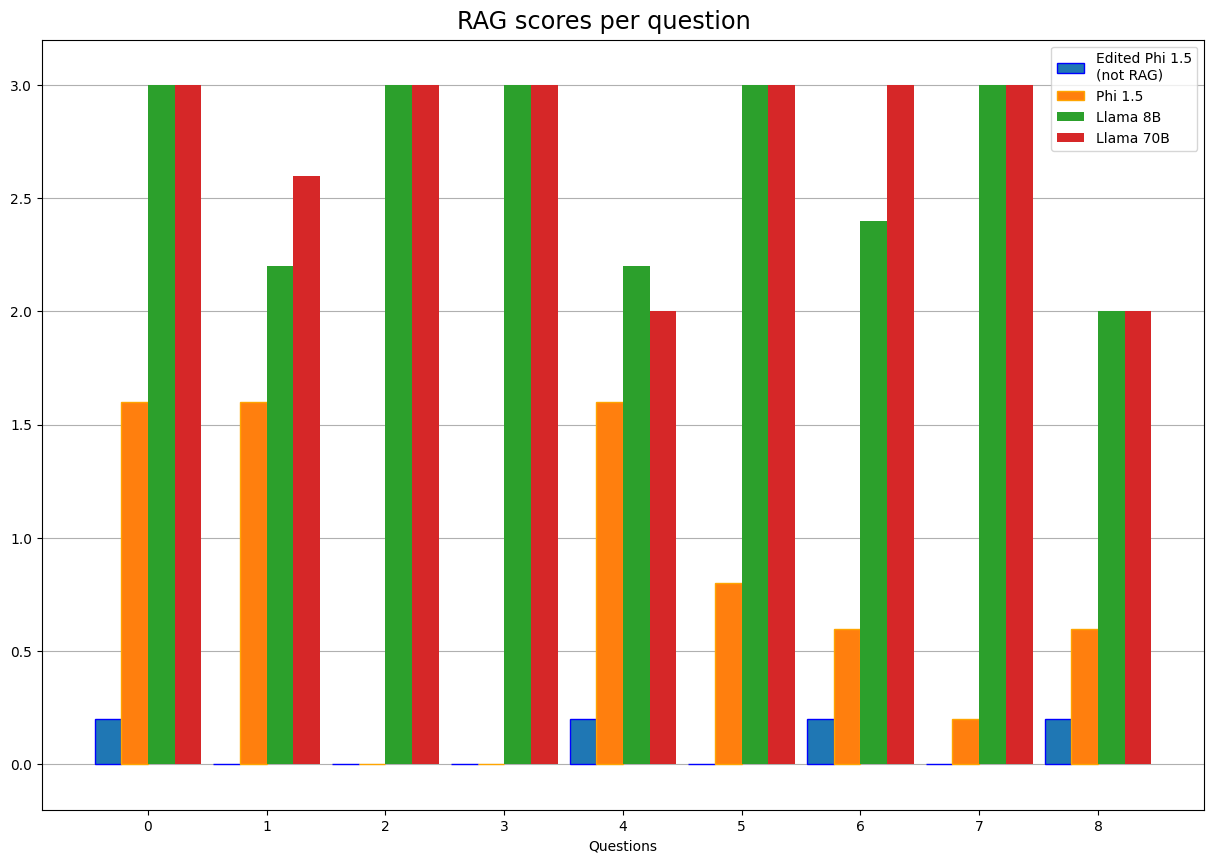

In [92]:
fig = plt.figure(figsize=[15, 10])

fig.suptitle("RAG scores per question", y=0.91, fontsize='xx-large')

plt.grid(axis='y')

width = 0.9
indices = np.arange(rag_results['phi_scores_df'].shape[0]) * 4

plt.bar(indices - width * 1.5, facts_results['edit_text_scores_df']['mean_score'], width, edgecolor='blue', zorder=3)
plt.bar(indices - width * 0.5, rag_results['phi_scores_df']['mean_score'], width, edgecolor='orange', zorder=3)
plt.bar(indices + width * 0.5, rag_results['llama8_scores_df']['mean_score'], width, zorder=3)
plt.bar(indices + width * 1.5, rag_results['llama70_scores_df']['mean_score'], width, zorder=3)

plt.xticks(indices, range(0, 9), zorder=0)

ax = plt.gca()

ax.set_ylim(-0.2, 3.2)

plt.legend(labels=["Edited Phi 1.5\n(not RAG)", "Phi 1.5", "Llama 8B", "Llama 70B"])

plt.xlabel("Questions")

plt.savefig("data/rag_scores_20240626.png")

plt.show()